In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/crop

/content/drive/MyDrive/Colab Notebooks/crop


1080378
969840
PSNR value is 28.296006942998318 dB


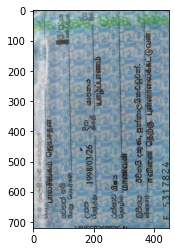

In [ ]:
from math import log10, sqrt
import cv2
import matplotlib.pyplot as plt
import numpy as np

def PSNR(original, compressed):
  #plt.imshow(original)
  mse = np.mean((original - compressed) ** 2)
  if(mse == 0): # MSE is zero means no noise is present in the signal .
				# Therefore PSNR have no importance.
        return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

def main():
  original = cv2.imread("img111.jpg")
  plt.imshow(original)
  print(original.size)
  original.resize(1000,1000)
  compressed = cv2.imread("u2 img111.jpg", 1)
  print(compressed.size)
  plt.imshow(compressed)
  compressed.resize(1000,1000)
  value = PSNR(original, compressed)
  print(f"PSNR value is {value} dB")
	
if __name__ == "__main__":
	main()


In [ ]:
!pip install scikit-image opencv-python imutils

In [ ]:
# Usage:
#
# python3 script.py --input original.png --output modified.png
# Based on: https://github.com/mostafaGwely/Structural-Similarity-Index-SSIM-

# 1. Import the necessary packages
from skimage import metrics
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt


first = "img368.jpg"
#first.resize(4000,3000)
second = "u2 img49.jpg"
#second.resize(4000,3000)

# 3. Load the two input images
imageA = cv2.imread(first)
imageA.resize(4000,3000)
imageB = cv2.imread(second)
imageB.resize(4000,3000)
plt.imshow(imageB)
# 4. Convert the images to grayscale
imageA = np.full((4000,3000,3), 12, np.uint8)
imageB = np.full((4000,3000,3), 12, np.uint8)


grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)
plt.imshow(imageB)
# 5. Compute the Structural Similarity Index (SSIM) between the two
#    images, ensuring that the difference image is returned
(score, diff) = metrics.structural_similarity(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")

# 6. You can print only the score if you want
print("SSIM: {}".format(score))